# 신경망 모델
### - 이진 분류: 유방암 예측 사례

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

- 데이터 준비

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
df['target'] = cancer.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
df.shape

(569, 31)

### 1. 데이터를 정규/표준화 하지 않은 경우

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target,
    test_size = 0.2, random_state = 2022
)

- 모델 정의

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense       # Fully Connected Network

In [ ]:
model = Sequential([
    Dense(100, input_shape = (30, ), activation = 'relu'),
    Dense(24, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               3100      
                                                                 
 dense_1 (Dense)             (None, 24)                2424      
                                                                 
 dense_2 (Dense)             (None, 1)                 25        
                                                                 
Total params: 5,549
Trainable params: 5,549
Non-trainable params: 0
_________________________________________________________________


- 모델 설정(컴파일)

In [ ]:
model.compile(optimizer='adam',  loss='binary_crossentropy', metrics = ['accuracy'])

- 모델 학습

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.2, 
                    epochs = 100, batch_size = 100)

Epoch 1/100
4/4 [==============================] - 2s 156ms/step - loss: 3.5882 - accuracy: 0.6538 - val_loss: 0.9563 - val_accuracy: 0.7692
Epoch 2/100
4/4 [==============================] - 0s 19ms/step - loss: 1.2364 - accuracy: 0.7198 - val_loss: 0.7209 - val_accuracy: 0.8462
Epoch 3/100
4/4 [==============================] - 0s 15ms/step - loss: 1.0501 - accuracy: 0.8709 - val_loss: 0.5952 - val_accuracy: 0.8571
Epoch 4/100
4/4 [==============================] - 0s 19ms/step - loss: 0.9870 - accuracy: 0.7582 - val_loss: 0.6652 - val_accuracy: 0.8242
Epoch 5/100
4/4 [==============================] - 0s 15ms/step - loss: 0.7424 - accuracy: 0.8709 - val_loss: 0.5962 - val_accuracy: 0.8791
Epoch 6/100
4/4 [==============================] - 0s 14ms/step - loss: 0.5820 - accuracy: 0.9038 - val_loss: 0.7461 - val_accuracy: 0.8022
Epoch 7/100
4/4 [==============================] - 0s 26ms/step - loss: 0.6225 - accuracy: 0.8214 - val_loss: 0.3194 - val_accuracy: 0.9231
Epoch 8/100
4/4 [==

- 모델 평가

In [ ]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.2378 - accuracy: 0.9123


[0.23780737817287445, 0.9122806787490845]

- 훈련과정 시각화: epoch에 따른 accuracy, val_loss의 변화

In [ ]:
y_acc = history.history['accuracy']
y_vloss = history.history['val_loss']
xs = np.arange(1, len(y_acc) + 1)

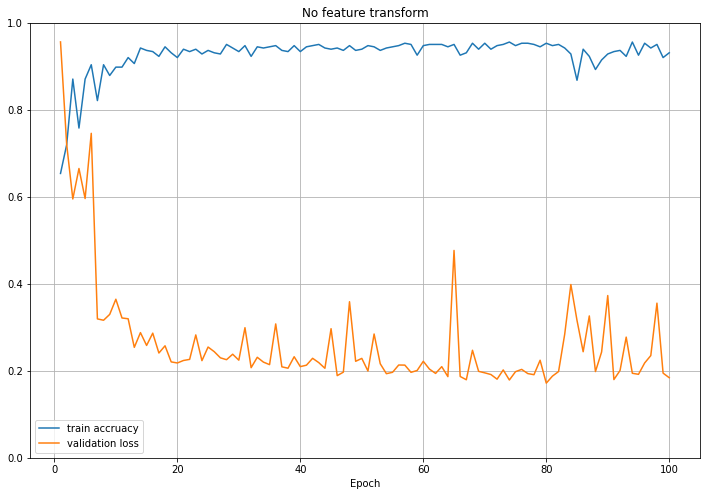

In [ ]:
plt.figure(figsize = (12, 8))
plt.plot(xs, y_acc, label = 'train accruacy')
plt.plot(xs, y_vloss, label = 'validation loss')
plt.legend(), plt.grid()
plt.ylim([0, 1])
plt.xlabel('Epoch')
plt.title('No feature transform')
plt.show()

### 2. 데이터를 정규/표준화한 경우

In [ ]:
from sklearn.preprocessing import StandardScaler
cancer_std = StandardScaler().fit_transform(cancer.data)

In [ ]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    cancer_std, cancer.target, stratify = cancer.target,
    test_size = 0.2, random_state = 2022
)

- 모델 정의

In [ ]:
model2 = Sequential()
model2.add(Dense(100, input_dim = 30, activation = 'relu'))
model2.add(Dense(24, activation = 'relu'))
model2.add(Dense(1, activation = 'sigmoid'))
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 100)               3100      
                                                                 
 dense_10 (Dense)            (None, 24)                2424      
                                                                 
 dense_11 (Dense)            (None, 1)                 25        
                                                                 
Total params: 5,549
Trainable params: 5,549
Non-trainable params: 0
_________________________________________________________________


- 모델 설정

In [ ]:
model2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

- 모델 학습

In [ ]:
hist2 = model2.fit(X_train2, y_train2, validation_split=0.2,
                   epochs = 100, batch_size = 100)

Epoch 1/100
4/4 [==============================] - 1s 88ms/step - loss: 0.5893 - accuracy: 0.7390 - val_loss: 0.5207 - val_accuracy: 0.8242
Epoch 2/100
4/4 [==============================] - 0s 16ms/step - loss: 0.4515 - accuracy: 0.8929 - val_loss: 0.4169 - val_accuracy: 0.9011
Epoch 3/100
4/4 [==============================] - 0s 15ms/step - loss: 0.3556 - accuracy: 0.9148 - val_loss: 0.3392 - val_accuracy: 0.9231
Epoch 4/100
4/4 [==============================] - 0s 15ms/step - loss: 0.2843 - accuracy: 0.9313 - val_loss: 0.2829 - val_accuracy: 0.9121
Epoch 5/100
4/4 [==============================] - 0s 19ms/step - loss: 0.2331 - accuracy: 0.9368 - val_loss: 0.2421 - val_accuracy: 0.9011
Epoch 6/100
4/4 [==============================] - 0s 13ms/step - loss: 0.1965 - accuracy: 0.9396 - val_loss: 0.2126 - val_accuracy: 0.9121
Epoch 7/100
4/4 [==============================] - 0s 20ms/step - loss: 0.1694 - accuracy: 0.9423 - val_loss: 0.1922 - val_accuracy: 0.9121
Epoch 8/100
4/4 [===

- 모델 평가

In [ ]:
model2.evaluate(X_test2, y_test2)

4/4 [==============================] - 0s 3ms/step - loss: 0.1248 - accuracy: 0.9825


[0.12480401247739792, 0.9824561476707458]

- 학습과정 시각화

In [ ]:
y_acc2 = hist2.history['accuracy']
y_vloss2 = hist2.history['val_loss']
xs = np.arange(1, len(y_acc2) + 1)

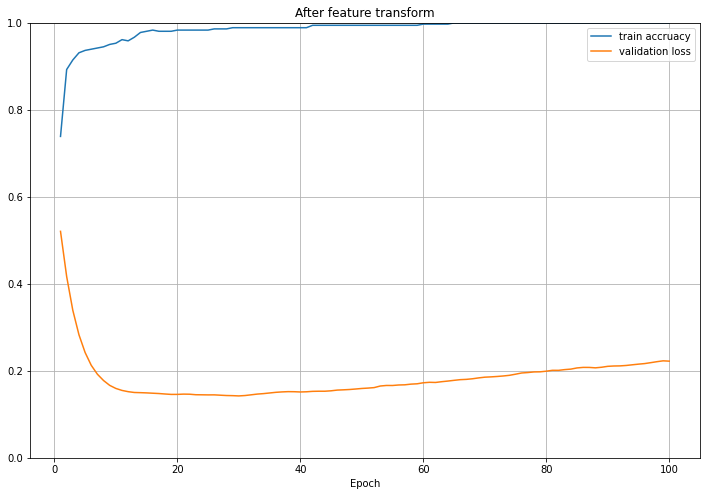

In [ ]:
plt.figure(figsize = (12, 8))
plt.plot(xs, y_acc2, label = 'train accruacy')
plt.plot(xs, y_vloss2, label = 'validation loss')
plt.legend(), plt.grid()
plt.ylim([0, 1])
plt.xlabel('Epoch')
plt.title('After feature transform')
plt.show()